In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\TicketOptimization\\Veri\\'
df = pd.read_csv(path + 'HatlarSahteVeri.csv')
df.head()

,HAT,FİYAT,SATIŞ
0,ISTANBUL-ANKARA,50,40
1,ANKARA-ISTANBUL,75,22
2,ANKARA-ISTANBUL,100,22
3,ISTANBUL-IZMIR,50,40
4,ANKARA-ISTANBUL,75,40


# AUTOENCODER

In [3]:
df.groupby('HAT').mean()

,FİYAT,SATIŞ
HAT,,
ANKARA-ISTANBUL,108.333333,25.0
ISTANBUL-ANKARA,107.142857,30.0
ISTANBUL-IZMIR,109.375000,26.5
IZMIR-ANKARA,120.000000,24.9


In [4]:
data = df.groupby('HAT').mean()

In [5]:
df.groupby('HAT').median()

,FİYAT,SATIŞ
HAT,,
ANKARA-ISTANBUL,100.0,23.5
ISTANBUL-ANKARA,75.0,25.0
ISTANBUL-IZMIR,100.0,23.5
IZMIR-ANKARA,100.0,22.0


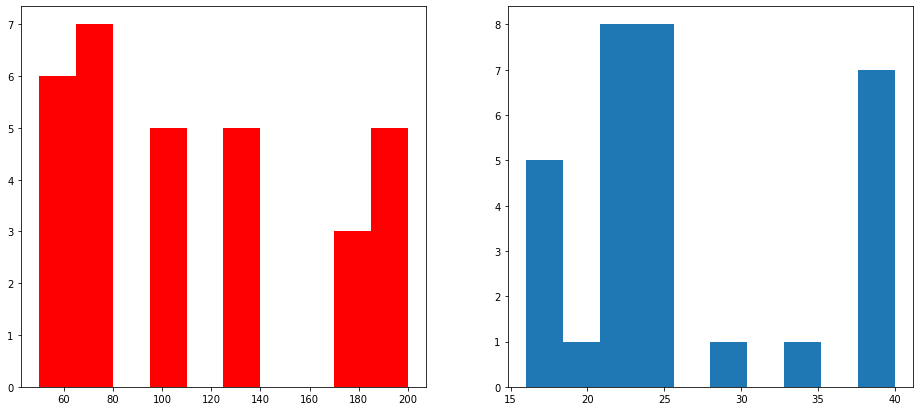

In [6]:
plt.figure(figsize = (16,7))

plt.subplot(1,2,1)
plt.hist(df['FİYAT'], color ='r');

plt.subplot(1,2,2)
plt.hist(df['SATIŞ']);

In [6]:
data

,FİYAT,SATIŞ
HAT,,
ANKARA-ISTANBUL,108.333333,25.0
ISTANBUL-ANKARA,107.142857,30.0
ISTANBUL-IZMIR,109.375000,26.5
IZMIR-ANKARA,120.000000,24.9


In [7]:
data['RAKİP1'] = [100, 95, 105, 110]
data['RAKİP2'] = [90, 85, 107, 135]
data['ZAMAN-ARALIĞI'] = [26, 45, 25, 10]

In [8]:
data

,FİYAT,SATIŞ,RAKİP1,RAKİP2,ZAMAN-ARALIĞI
HAT,,,,,
ANKARA-ISTANBUL,108.333333,25.0,100,90,26
ISTANBUL-ANKARA,107.142857,30.0,95,85,45
ISTANBUL-IZMIR,109.375000,26.5,105,107,25
IZMIR-ANKARA,120.000000,24.9,110,135,10


<AxesSubplot:ylabel='HAT'>

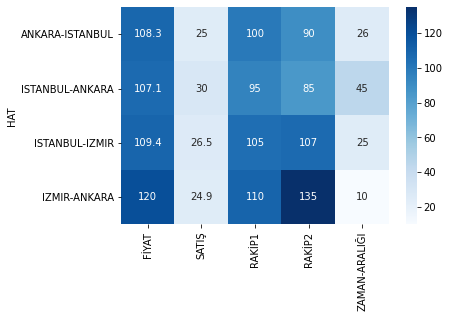

In [9]:
sns.heatmap(data,annot =True, cmap ='Blues',fmt='.4g')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [11]:
encoder = Sequential()
encoder.add(Dense(4, activation='relu', input_shape=[5]))
encoder.add(Dense(2, activation='relu'))

decoder = Sequential()
decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(5, activation='relu'))

In [12]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='mse', optimizer = SGD(lr = 1.2))

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(data.values)

In [14]:
autoencoder.fit(train,train, epochs=20)

Train on 4 samples
Epoch 1/20
4/4 [==============================] - 1s 211ms/sample - loss: 0.2883
Epoch 2/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.2165
Epoch 3/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.1938
Epoch 4/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.1756
Epoch 5/20
4/4 [==============================] - 0s 1ms/sample - loss: 0.1122
Epoch 6/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.1015
Epoch 7/20
4/4 [==============================] - 0s 1ms/sample - loss: 0.0961
Epoch 8/20
4/4 [==============================] - 0s 1ms/sample - loss: 0.0922
Epoch 9/20
4/4 [==============================] - 0s 5ms/sample - loss: 0.0896
Epoch 10/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.0876
Epoch 11/20
4/4 [==============================] - 0s 3ms/sample - loss: 0.0865
Epoch 12/20
4/4 [==============================] - 0s 13ms/sample - loss: 0.0856
Epoch 13/20
4/4 [==========

<AxesSubplot:>

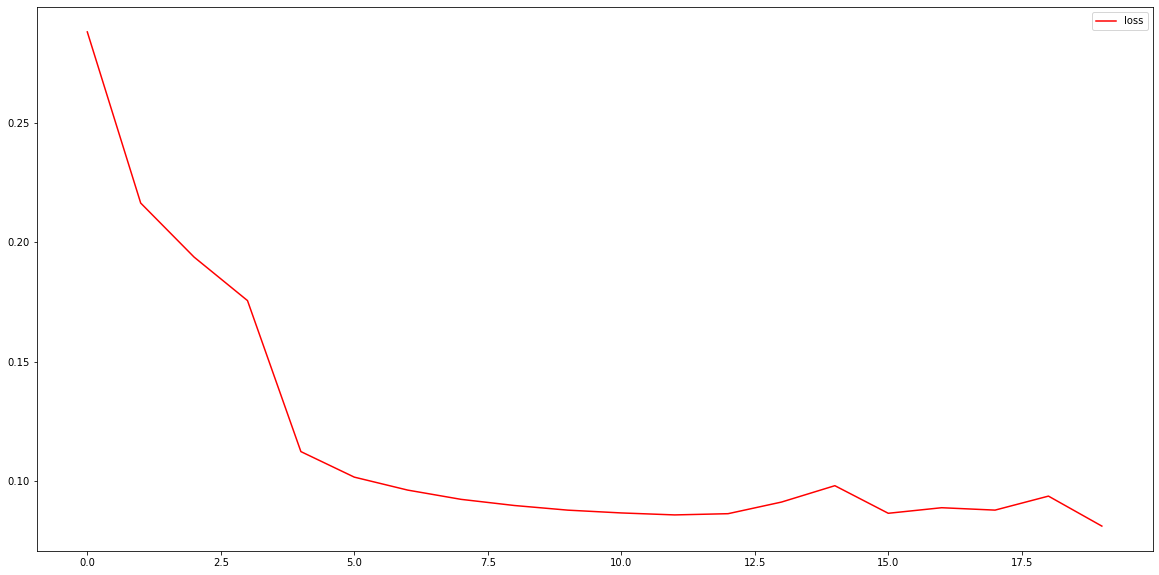

In [15]:
loss=pd.DataFrame(autoencoder.history.history)
loss.plot(figsize=(20,10),color='r')

In [16]:
encoded_2dim = encoder.predict(train)
encoded_2dim

array([[0.54440665, 0.        ],
       [1.6859181 , 0.        ],
       [0.6880527 , 0.        ],
       [0.        , 0.7085873 ]], dtype=float32)

In [131]:
data.transpose().columns

Index(['ANKARA-ISTANBUL', 'ISTANBUL-ANKARA', 'ISTANBUL-IZMIR', 'IZMIR-ANKARA'], dtype='object', name='HAT')

In [18]:
result = pd.DataFrame(data=encoded_2dim,
                     columns =['D1','D2'])

In [19]:
result['HAT'] = data.transpose().columns
result = result.sort_values('D1')
result

,D1,D2,HAT
0,0.544407,0.000000,ANKARA-ISTANBUL
1,1.685918,0.000000,ISTANBUL-ANKARA
2,0.688053,0.000000,ISTANBUL-IZMIR
3,0.000000,0.708587,IZMIR-ANKARA


In [90]:
hat = np.array(result['HAT'])

<AxesSubplot:xlabel='D1', ylabel='D2'>

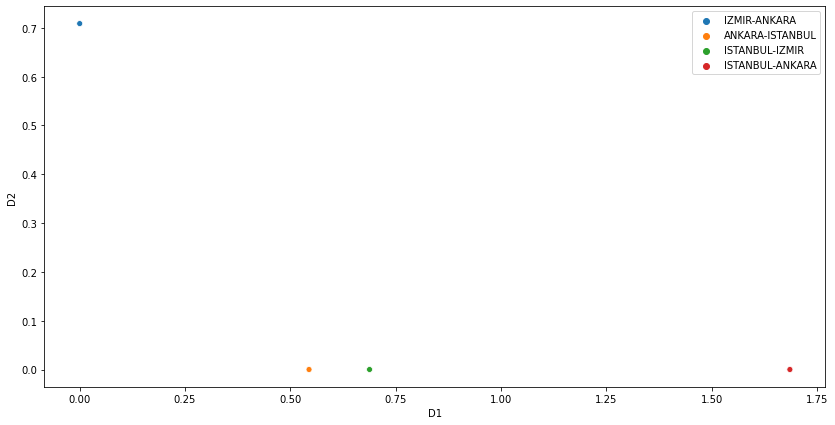

In [92]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='D1',y='D2',data=result, hue = hat)

<AxesSubplot:ylabel='HAT'>

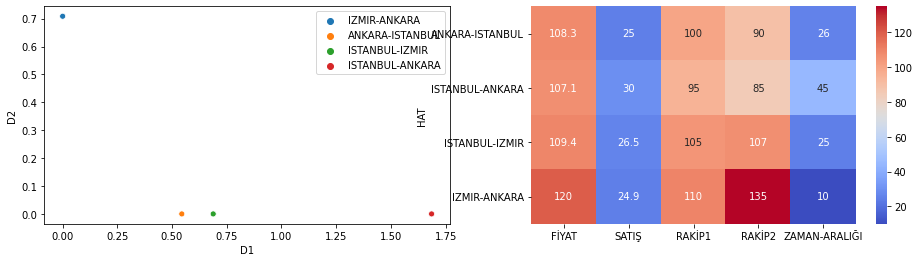

In [97]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.scatterplot(x='D1',y='D2',data=result, hue = hat)

plt.subplot(1,2,2)
sns.heatmap(data,annot =True, cmap ='coolwarm',fmt='.4g')


#plt.savefig('ScatterPlot_09.png')


In [26]:
points = np.array(result[['D1', 'D2']])
names = result['HAT'].values

In [72]:
def pisagor(points, names):
    distances = []

    for point1, name1 in zip(points, names):
        for point2, name2 in zip(points, names):

            distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
            distances.append([name1 + ' & ' + name2, distance])

    distances = pd.DataFrame(distances)        
    distances['HATLAR'] = distances[0]
    distances['MESAFELER'] = distances[1]
    distances.drop([0,1], inplace = True, axis =1)
    distances = distances.drop_duplicates(subset = ['MESAFELER']).drop([0], axis = 0)
    
    return distances.sort_values('MESAFELER')

In [73]:
distances = pisagor(points, names)
distances

,HATLAR,MESAFELER
2,ANKARA-ISTANBUL & ISTANBUL-IZMIR,0.143646
3,ANKARA-ISTANBUL & IZMIR-ANKARA,0.893574
11,ISTANBUL-IZMIR & IZMIR-ANKARA,0.987680
6,ISTANBUL-ANKARA & ISTANBUL-IZMIR,0.997865
1,ANKARA-ISTANBUL & ISTANBUL-ANKARA,1.141511
7,ISTANBUL-ANKARA & IZMIR-ANKARA,1.828774


<AxesSubplot:ylabel='HAT'>

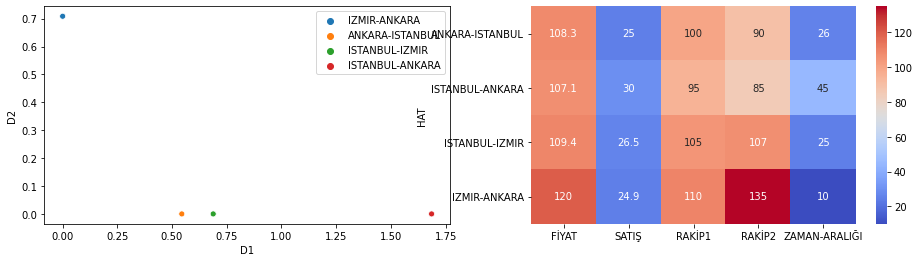

In [98]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.scatterplot(x='D1',y='D2',data=result, hue = hat)

plt.subplot(1,2,2)
sns.heatmap(data,annot =True, cmap ='coolwarm',fmt='.4g')


#plt.savefig('ScatterPlot_09.png')
